In [1]:
import os
import cv2 as cv

In [2]:
rois_path= r'C:\Users\Wilk-PC\Computer_vision_medical_images\roi'

In [3]:
class_1=[]
class_2=[]
for filename in os.listdir(rois_path):
    if filename!='matches':
        roi_class = int(filename.split("class=")[1].split('.')[0])
        if roi_class == 1:
            class_1.append(rois_path+'\\'+filename)
        if roi_class == 2:
            class_2.append(rois_path+'\\'+filename)

In [4]:
img_path = class_1[0]
img_path2 = class_1[1]

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img_path2, cv2.IMREAD_GRAYSCALE)
#image8bit = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

In [6]:
sift = cv2.SIFT_create()
#surf = cv2.SURF_create()
#orb = cv2.ORB_create(nfeatures=1500)

In [7]:
keypoints_sift, descriptors = sift.detectAndCompute(img, None)
keypoints_sift2, descriptors2 = sift.detectAndCompute(img2, None)
#img = cv2.drawKeypoints(img, keypoints_sift, None)
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

In [8]:
matches = bf.match(descriptors, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)
matching_result = cv2.drawMatches(img, keypoints_sift, img2, keypoints_sift2, matches[:10], None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

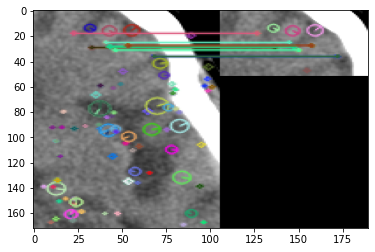

In [9]:
plt.imshow(matching_result,aspect="auto")
plt.show()

In [10]:
matches[2].distance

0.0

In [11]:
def check_patient(combination):
    name1=combination[0]
    name2=combination[1]
    patient_name_1 = name1.split('\\')[5].split('.')[0]
    patient_name_2 = name2.split('\\')[5].split('.')[0]
    eq = patient_name_1 != patient_name_2
    #print(eq)
    return eq

In [12]:
import itertools
#combinations = list(itertools.combinations(class_1[0:10], 2))
combinations = list(itertools.combinations(class_1, 2))
fcombinations=[img for img in combinations if check_patient(img)]

In [18]:
max_distance = 350
min_matches = 10

In [23]:
len(fcombinations) != len(combinations)
len(fcombinations)

38599956

In [123]:
def find_similar(img_tuple,show=False,to_file=False,print_warnings=False,exists=True):
    img1_name= img_tuple[0]
    img2_name= img_tuple[1]
    img1 = cv2.imread(img1_name, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_name, cv2.IMREAD_GRAYSCALE)
    name1=img1_name.split('\\')[5].split('=')[0]
    name2=img2_name.split('\\')[5].split('=')[0]
    if name1>name2:
        filename=name1+'_to_'+name2
    else:
        filename=name2+'_to_'+name1
    sift = cv2.SIFT_create()
    filepath = rois_path+'\\'+'matches'+'\\'+filename+'max_distance='+str(max_distance)+'.png'
    if os.path.isfile(filepath):
        return None
    keypoints_sift1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints_sift2, descriptors2 = sift.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    if len(keypoints_sift1) > 0 and len(keypoints_sift2) > 0 :
        matches = [match for match in bf.match(descriptors1, descriptors2) if match.distance < max_distance]
        if len(matches)>=min_matches:
            matches = sorted(matches, key = lambda x:x.distance)
            if show:
                matching_result = cv2.drawMatches(img1, keypoints_sift1, img2, keypoints_sift2, matches[:min_matches], None, flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
                plt.imshow(matching_result,aspect="auto")
                plt.show()
            if to_file:
                matching_result = cv2.drawMatches(img1, keypoints_sift1, img2, keypoints_sift2, matches[:min_matches], None, flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
                
                cv2.imwrite(filepath, matching_result)
            
            return filename
        else:
            if print_warnings:
                print(len(matches),'Not enouth matches',img_tuple)
    else:
        if print_warnings:
            print('not enought keypoints',len(keypoints_sift1),len(keypoints_sift2))
        

In [124]:
from tqdm import tqdm

In [125]:
sets = []
num_combinations=1440000
for comb in tqdm(fcombinations[:num_combinations]):
    sets.append(find_similar(comb,show=False,to_file=True,print_warnings=False))

100%|██████████████████████████████████████████████████████████████████████| 1440000/1440000 [4:05:16<00:00, 97.85it/s]


In [126]:
import pickle
with open('test.pickle', 'wb') as file:
    pickle.dump(sets, file)

In [127]:
with open('test.pickle', 'rb') as file:
    sets = pickle.load(file)
    sets = [s for s in sets if s is not None]

In [128]:
dic={}
for match in sets:
    s= match.split('.')
    patient_id=s[0]
    patient_id_2=s[2].split('_')[5]
    if patient_id > patient_id_2:
        key=patient_id+'_'+patient_id_2
    else:
        key=patient_id2+'_'+patient_id_
    if key in dic.keys():
        dic[key]+=1
    else:
        dic[key]=1

In [129]:
dict(sorted(dic.items(), key=lambda item: item[1]))

{'P039_P001': 3036,
 'P036_P001': 3089,
 'P029_P001': 3779,
 'P068_P001': 3955,
 'P050_P001': 4715,
 'P064_P001': 5561,
 'P051_P001': 6068,
 'P027_P001': 6647,
 'P040_P001': 7540,
 'P052_P001': 7603,
 'P066_P001': 7699,
 'P038_P001': 8067,
 'P048_P001': 8297,
 'P056_P001': 8460,
 'P045_P001': 8468,
 'P016_P001': 8867,
 'P020_P001': 9163,
 'P055_P001': 9280,
 'P014_P001': 9552,
 'P049_P001': 9933,
 'P054_P001': 9981,
 'P057_P001': 10361,
 'P044_P001': 11097,
 'P002_P001': 11189,
 'P009_P001': 11275,
 'P062_P001': 11300,
 'P021_P001': 11323,
 'P042_P001': 11384,
 'P012_P001': 11479,
 'P033_P001': 11556,
 'P026_P001': 11558,
 'P035_P001': 11613,
 'P059_P001': 12113,
 'P060_P001': 12191,
 'P007_P001': 12253,
 'P025_P001': 12268,
 'P006_P001': 12332,
 'P063_P001': 12811,
 'P034_P001': 12817,
 'P017_P001': 12841,
 'P037_P001': 12895,
 'P030_P001': 13067,
 'P032_P001': 13094,
 'P018_P001': 13282,
 'P067_P001': 13439,
 'P004_P001': 13445,
 'P023_P001': 13668,
 'P043_P001': 13706,
 'P031_P001':